# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | la passe
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | achinsk
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | mahilyow
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | margate
Processing Record 12 of Set 1 | kerikeri
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | suva
Processing Record 15 of Set 1 | chonchi
Processing Record 16 of Set 1 | olyokminsk
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | tuy hoa
Processing Record 21 of Set 1 | rio grande
Processing Record 22 of Set 1 | laguna
Processing Record 23 of Set 1 | fale old se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,17.23,36,55,2.68,US,1713914729
1,avarua,-21.2078,-159.7750,28.03,61,40,3.09,CK,1713914792
2,port-aux-francais,-49.3500,70.2167,4.33,69,45,16.28,TF,1713914793
3,la passe,45.5549,-0.8967,11.10,80,66,3.79,FR,1713914794
4,adamstown,-25.0660,-130.1015,23.00,85,100,8.87,PN,1713914794


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.23,36,55,2.68,US,1713914729
1,avarua,-21.2078,-159.7750,28.03,61,40,3.09,CK,1713914792
2,port-aux-francais,-49.3500,70.2167,4.33,69,45,16.28,TF,1713914793
3,la passe,45.5549,-0.8967,11.10,80,66,3.79,FR,1713914794
4,adamstown,-25.0660,-130.1015,23.00,85,100,8.87,PN,1713914794


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

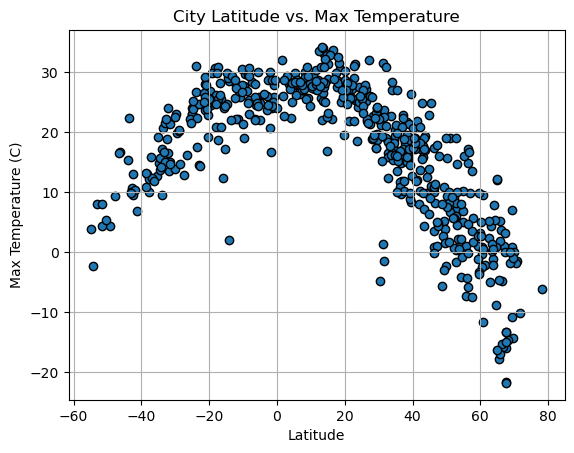

In [10]:
# Build scatter plot for latitude vs. temperature
temp_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

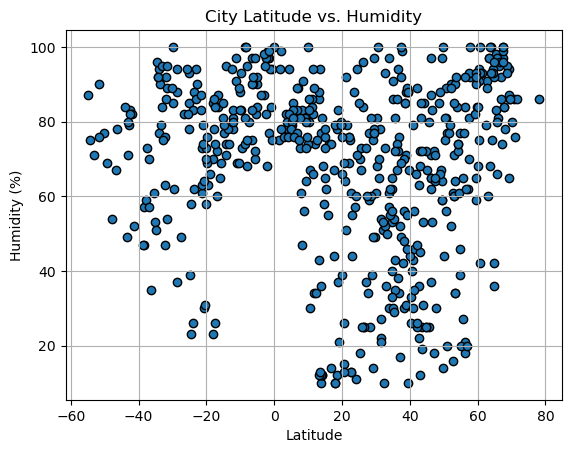

In [11]:
# Build the scatter plots for latitude vs. humidity
hum_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

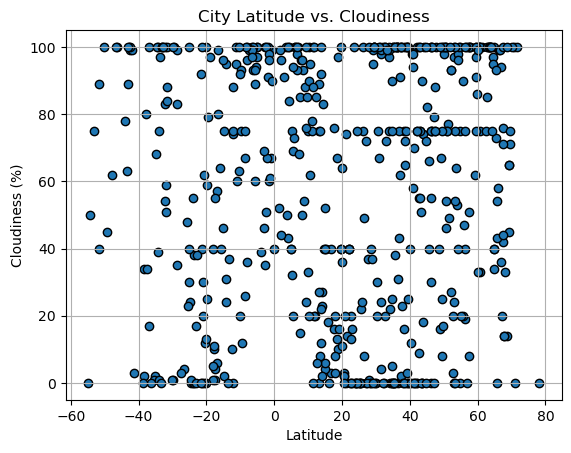

In [12]:
# Build the scatter plots for latitude vs. cloudiness
cloud_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

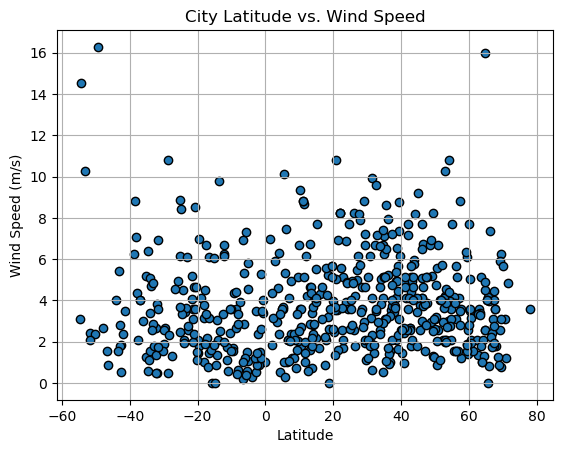

In [13]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def lin_reg(df, x, y):
   
    # Calculate linear regression statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    
    # Calculate regression values
    regress_values = df[x] * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot the data points and the regression line
    plt.scatter(df[x], df[y])
    plt.plot(df[x], regress_values, c='red', label=f'Linear Regression Line\n{line_eq}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid(True)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.23,36,55,2.68,US,1713914729
3,la passe,45.5549,-0.8967,11.10,80,66,3.79,FR,1713914794
5,achinsk,56.2694,90.4993,-5.72,84,19,3.08,RU,1713914797
6,lihue,21.9789,-159.3672,27.58,69,40,8.23,US,1713914797
7,mahilyow,53.9139,30.3364,1.53,84,53,3.01,BY,1713914797


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,28.03,61,40,3.09,CK,1713914792
2,port-aux-francais,-49.3500,70.2167,4.33,69,45,16.28,TF,1713914793
4,adamstown,-25.0660,-130.1015,23.00,85,100,8.87,PN,1713914794
8,uturoa,-16.7333,-151.4333,28.22,72,6,1.43,PF,1713914798
9,codrington,-38.2667,141.9667,13.09,57,34,7.06,AU,1713914800


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8699292434387371


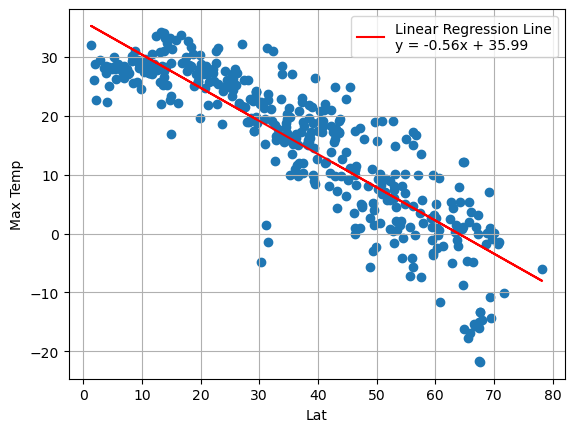

In [51]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7526105678895386


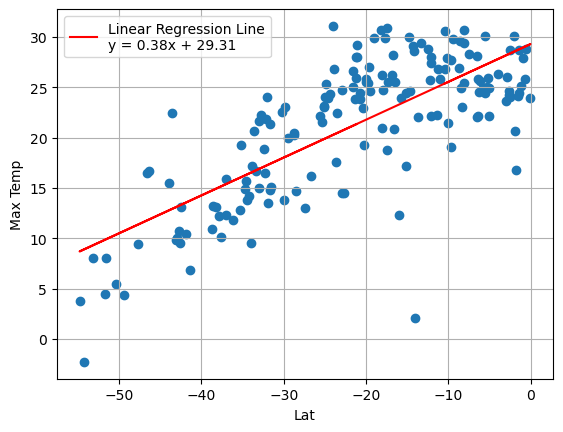

In [38]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** Of the four traits that were compared to latitude, "Max Temperature" has the biggest variance when differentiating between hemispheres. For the northern hemisphere there is a negative correlation with an r-value of -0.87 and for the southern hemisphere there is a positive correlation with an r-value of 0.75. This represents the idea that the further a city is from the equator the cooler the temperature is. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15246775183888278


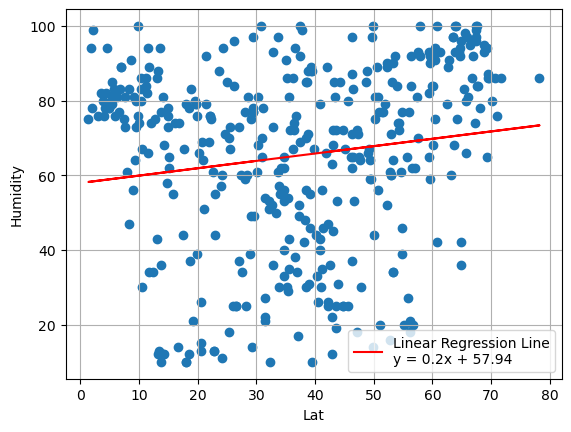

In [39]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.29668022380010867


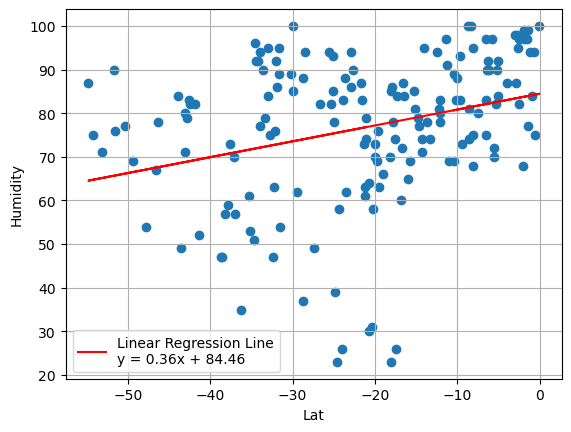

In [40]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** The northern and southern hemisphere's linear regression for humidity are both positive correlations, however, with their r-values being 0.15 and 0.29, these data aren't the most telling. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1422136495783576


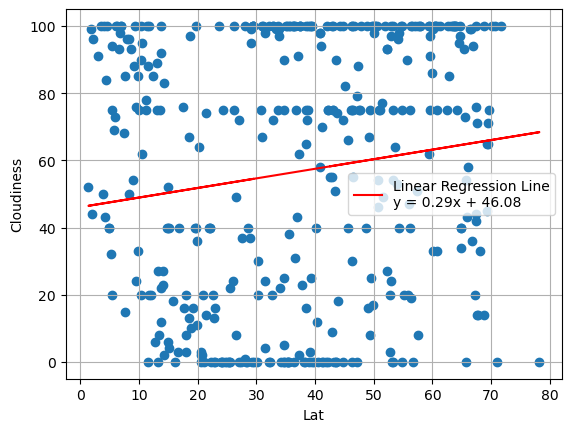

In [41]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.11509012983494496


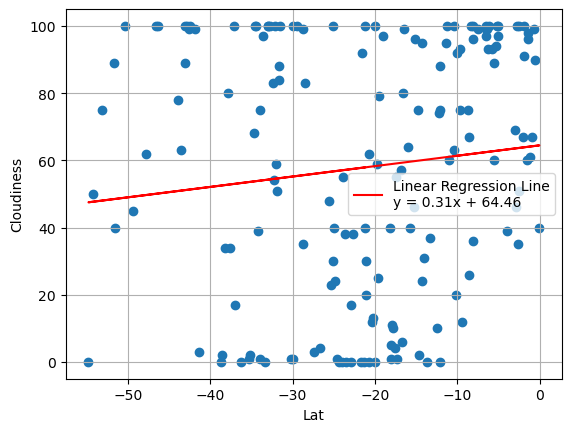

In [42]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** When comparing the linear regressions of the two hemispheres and cloudiness, there doesn't seem to be much of a difference. The northern hemisphere's r-value is 0.14 while the southern's is 0.11. Cloudiness had the most similar regressions of the four characteristics that were compared to latitude. With r-values so close to 0, there is not much of a linear association between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04801694950667759


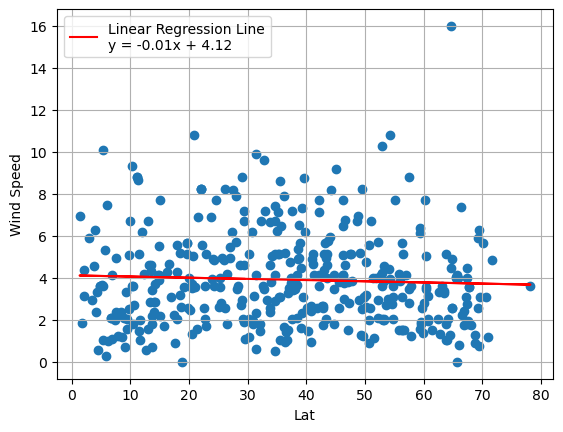

In [52]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.24478565863995552


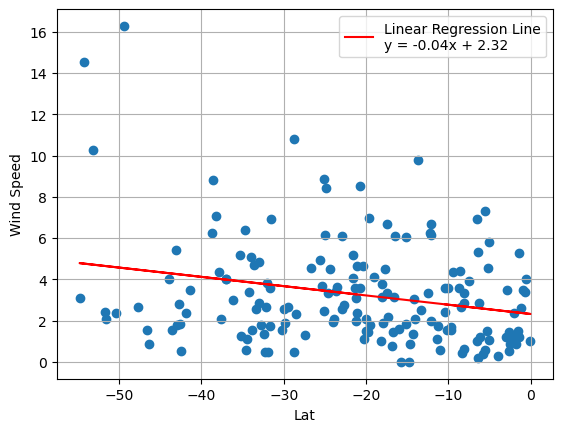

In [43]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** Wind speed in the northern hemisphere almost has no relationship to latitude with an r-value of -0.04. The southern hemisphere has more of a relationship with a greater r-value of -0.24. Both are negative correlations.